# Best Subset Selection

In [1]:
options(warn = -1)

In [9]:
library(ISLR)
library(leaps)

In [3]:
fix(Hitters)

In [5]:
sum(is.na(Hitters))

[1] 59

In [6]:
Hitters = na.omit(Hitters)
sum(is.na(Hitters))

[1] 0

In [11]:
regfit.full = regsubsets(Salary ~ ., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [12]:
regfit.full = regsubsets(Salary ~ ., Hitters, nvmax = 19)
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [13]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

In [15]:
which.max(reg.summary$adjr2)

[1] 11

In [16]:
which.min(reg.summary$cp)

[1] 10

In [18]:
which.min(reg.summary$bic)

[1] 6

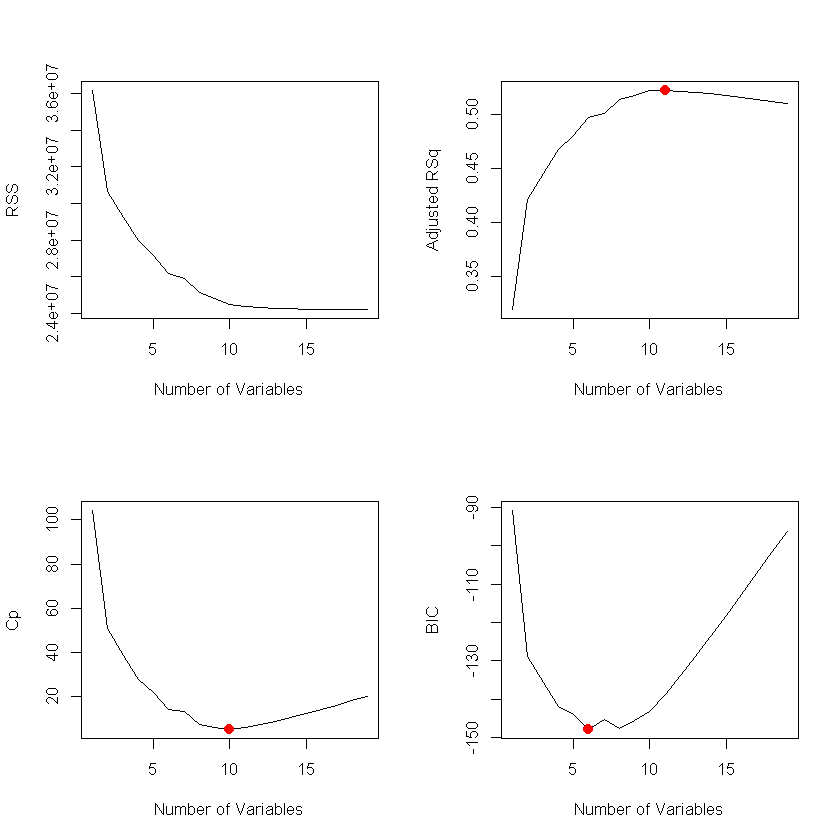

In [19]:
par(mfrow = c(2, 2))

plot(reg.summary$rss, xlab = 'Number of Variables', ylab = 'RSS', type = 'l')

plot(reg.summary$adjr2, xlab = 'Number of Variables', ylab = 'Adjusted RSq', type = 'l')
points(11, reg.summary$adjr2[11], col = 'red', cex = 2, pch = 20)

plot(reg.summary$cp, xlab = 'Number of Variables', ylab = 'Cp', type = 'l')
points(10, reg.summary$cp[10], col = 'red', cex = 2, pch = 20)

plot(reg.summary$bic, xlab = 'Number of Variables', ylab = 'BIC', type = 'l')
points(6, reg.summary$bic[6], col = 'red', cex = 2, pch = 20)

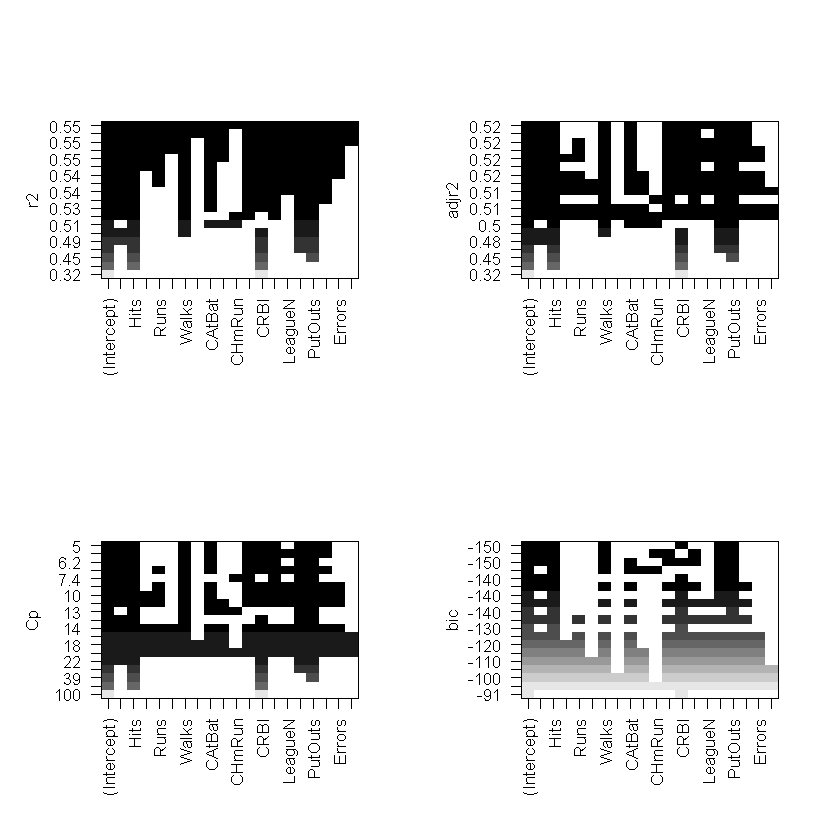

In [21]:
par(mfrow = c(2, 2))

plot(regfit.full, scale = 'r2')
plot(regfit.full, scale = 'adjr2')
plot(regfit.full, scale = 'Cp')
plot(regfit.full, scale = 'bic')

In [22]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# Forward and Backward Stepwise Selection

In [23]:
regfit.fwd = regsubsets(Salary ~ ., Hitters, nvmax = 19, method = 'forward')
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) 

In [24]:
regfit.bwd = regsubsets(Salary ~ ., Hitters, nvmax = 19, method = 'backward')
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 
2  ( 1 

In [25]:
coef(regfit.full, 7)
coef(regfit.fwd, 7)
coef(regfit.bwd, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

# Choosing Among Models Using the Validation Set

In [26]:
set.seed(1)
train = sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test = !train

In [34]:
regfit.best = regsubsets(Salary ~ ., Hitters[train,], nvmax = 19)
test.mat = model.matrix(Salary ~ ., Hitters[test,])
val.errors = rep(NA, 19)
for (i in 1:19) {
  coefi = coef(regfit.best, id = i)
  pred = test.mat[, names(coefi)] %*% coefi
  val.errors[i] = mean((Hitters$Salary[test] - pred) ^ 2)
}

In [35]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [28]:
which.min(val.errors)

[1] 7

In [29]:
coef(regfit.best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

In [30]:
predict.regsubsets = function(object, newdata, id, ...) {
  form = as.formula(object$call[[2]])
  mat = model.matrix(form, newdata)
  coefi = coef(object, id = id)
  xvars = names(coefi)
  mat[, xvars] %*% coefi
}

In [31]:
regfit.best = regsubsets(Salary ~ ., Hitters, nvmax = 19)
coef(regfit.best, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [32]:
k = 10
set.seed(1)
folds = sample(1:k, nrow(Hitters), replace = TRUE)
cv.errors = matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))
for (j in 1:k) {
  best.fit = regsubsets(Salary ~ ., data = Hitters[folds != j,], nvmax = 19)
  for (i in 1:19) {
    pred = predict(best.fit, Hitters[folds == j,], id = i)
    cv.errors[j, i] = mean((Hitters$Salary[folds == j] - pred) ^ 2)
  }
}

In [36]:
mean.cv.errors = apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

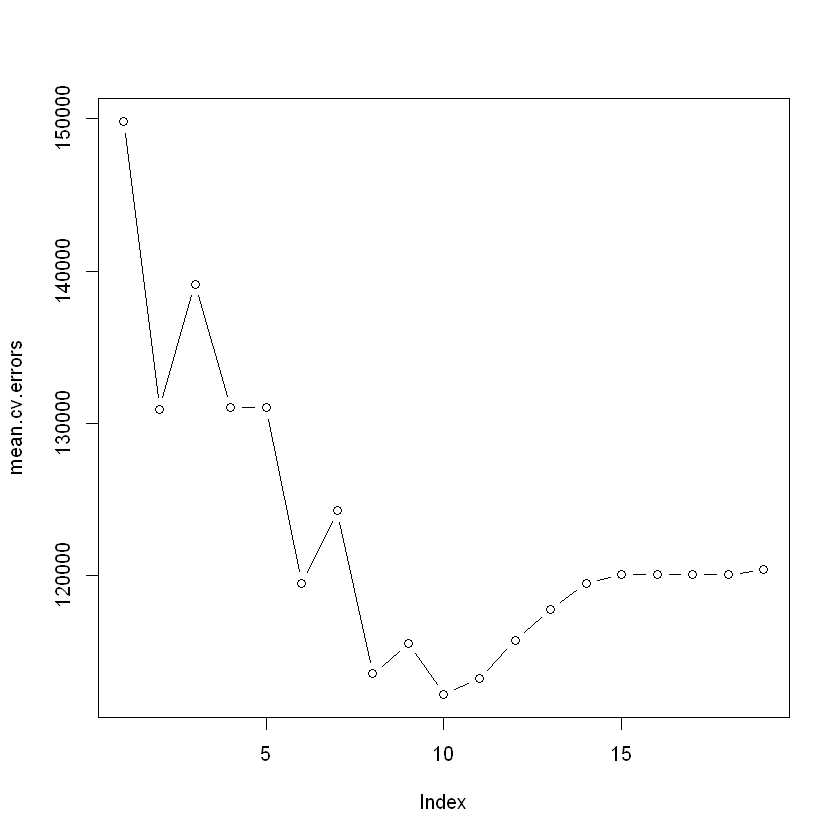

In [37]:
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = 'b')

In [38]:
reg.best = regsubsets(Salary ~ ., Hitters, nvmax = 19)
coef(reg.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680